# **Heart Disease Data Analytics Project**

## Objectives

* This goal of this notebook is to analyse health data to understand the relationship and trends of various risk factors such as _diabetes_, _cholesterol_ and _stress_ in relation to heart disease. 

## Inputs

### Data souce
* The primary dataset for this project is heart disease data collected from Kaggle intended for research purposes
https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Section 1 : Design & implement an ETL pipeline

## 1.1 Extract: Importing Libraries, Extracting dataset & Truncating 

* This section involves importing libraries necessary for subsequent data analysis and visualisation tasks.
* The pandas library will be utilised in reading the csv data in order to work with it.
* The dataset will be limited to the first 600 rows to make analysis more manageable.

In [247]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

# using pandas library to read the csv data in
df_full = pd.read_csv('/workspace/heart-disease-data-hackathon-1/jupyter_notebooks/heart_disease.csv')

# truncating dataset
df_shuffled = df_full.sample(frac=1, random_state=21)
df = df_shuffled.head(600)


In [248]:
# displaying the first 5 rows
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
3644,66.0,Female,126.0,247.0,High,Yes,No,No,37.095005,Yes,...,No,High,High,9.099281,High,167.0,153.0,1.846853,17.011822,No
1828,56.0,Female,147.0,252.0,High,Yes,No,No,22.072248,No,...,No,None,Low,7.762298,Medium,287.0,111.0,9.179524,15.839637,No
6661,25.0,Male,179.0,161.0,Medium,No,No,Yes,39.649365,No,...,No,Medium,Low,9.017348,Medium,243.0,82.0,10.194241,7.824417,No
9216,23.0,Male,180.0,165.0,Medium,No,Yes,Yes,20.582839,No,...,Yes,High,High,7.963712,High,393.0,131.0,1.270569,13.425488,Yes
5911,68.0,Female,180.0,184.0,High,Yes,No,Yes,39.067528,No,...,Yes,Medium,High,8.750243,High,112.0,135.0,6.981924,11.748932,No


In [249]:
# displaying the last 5 rows
df.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
5570,44.0,Female,128.0,289.0,High,Yes,Yes,Yes,25.329838,Yes,...,No,Medium,Medium,9.186045,High,119.0,138.0,6.645268,19.458495,No
7752,51.0,Female,162.0,278.0,Medium,Yes,No,Yes,22.653247,No,...,No,Medium,Low,9.482568,Low,178.0,148.0,5.370015,16.119249,No
4518,55.0,Female,163.0,174.0,Medium,Yes,Yes,No,30.095571,Yes,...,No,High,Low,6.126695,Low,220.0,159.0,6.507096,6.266838,No
9869,40.0,Female,144.0,242.0,High,No,Yes,No,30.784915,Yes,...,No,High,Low,8.073106,Medium,253.0,116.0,10.583279,8.794973,Yes
3689,32.0,Female,134.0,297.0,High,No,No,Yes,22.657699,Yes,...,Yes,Medium,High,6.033091,Medium,398.0,128.0,11.691410,8.789053,No


---

## 1.2 Transform: Data cleaning & Pre-processing

* This section involves handling missing, duplicate and invalid values.
* Checks will be done to ensure each attribute has a data type suitable for further analysis.
* Outlier values will be identified and discarded.

#### 1.2.1 Overview of initial state of dataset

In [250]:
# overview of rows and columns of the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 3644 to 3689
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   598 non-null    float64
 1   Gender                599 non-null    object 
 2   Blood Pressure        598 non-null    float64
 3   Cholesterol Level     599 non-null    float64
 4   Exercise Habits       600 non-null    object 
 5   Smoking               596 non-null    object 
 6   Family Heart Disease  599 non-null    object 
 7   Diabetes              596 non-null    object 
 8   BMI                   599 non-null    float64
 9   High Blood Pressure   598 non-null    object 
 10  Low HDL Cholesterol   599 non-null    object 
 11  High LDL Cholesterol  600 non-null    object 
 12  Alcohol Consumption   600 non-null    object 
 13  Stress Level          599 non-null    object 
 14  Sleep Hours           595 non-null    float64
 15  Sugar Consumption  

In [251]:
# view all columns in data set
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [252]:
# check data types of each column
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

Having cross referenced against the data columns,  each attribute has a valid data type for processing - attributes consist of categorical attributes (object) and numerical attributes (float64) inline with expected values

#### 1.2.2 Identifying missing & automated checking of duplicate data

In [253]:
# Identifying missing values
df.isnull().sum()

Age                     2
Gender                  1
Blood Pressure          2
Cholesterol Level       1
Exercise Habits         0
Smoking                 4
Family Heart Disease    1
Diabetes                4
BMI                     1
High Blood Pressure     2
Low HDL Cholesterol     1
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            1
Sleep Hours             5
Sugar Consumption       0
Triglyceride Level      3
Fasting Blood Sugar     1
CRP Level               1
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [254]:
# having identified our missing values we will use the dropna function to remove the rows containing missing values.
df = df.dropna()

# to confirm this action we will check for null values and view the shape of the data to verify this.
df.isnull().sum()
df.shape

(570, 21)

In [255]:
# automated checking for duplicates

def checkDuplicates(df):   
    duplicate_data = df.duplicated().sum()
    return duplicate_data

duplicate_data = checkDuplicates(df)
print(f"There are {duplicate_data} rows with duplicate data.")

There are 0 rows with duplicate data.


Here we have verified that there are no longer rows with missing values or duplicate rows.

#### 1.2.3 Summary Statistics

In [256]:
# In order to get an overview of the data spread we will use summary statistics
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,49.468421,149.980702,226.710526,29.099249,6.905390,254.959649,120.005263,7.342028,12.526262
std,17.875174,17.474802,44.297747,6.318880,1.753576,88.051971,23.426098,4.431415,4.296933
min,18.000000,120.000000,150.000000,18.036585,4.010276,100.000000,80.000000,0.015467,5.026882
25%,34.000000,134.000000,187.000000,23.906540,5.343904,182.000000,99.000000,3.419958,8.720767
50%,50.000000,149.000000,230.000000,28.918380,6.805045,253.000000,121.000000,7.472740,12.714591
75%,65.000000,165.000000,265.000000,34.663369,8.444466,328.000000,141.000000,11.148949,16.293438
max,80.000000,180.000000,300.000000,39.979486,9.985016,400.000000,160.000000,14.968879,19.996547


#### 1.2.4 Identifying outlier values
* We can identify outliers by using visualisation methods such as box plots for numerical attributes and count plots for categorical

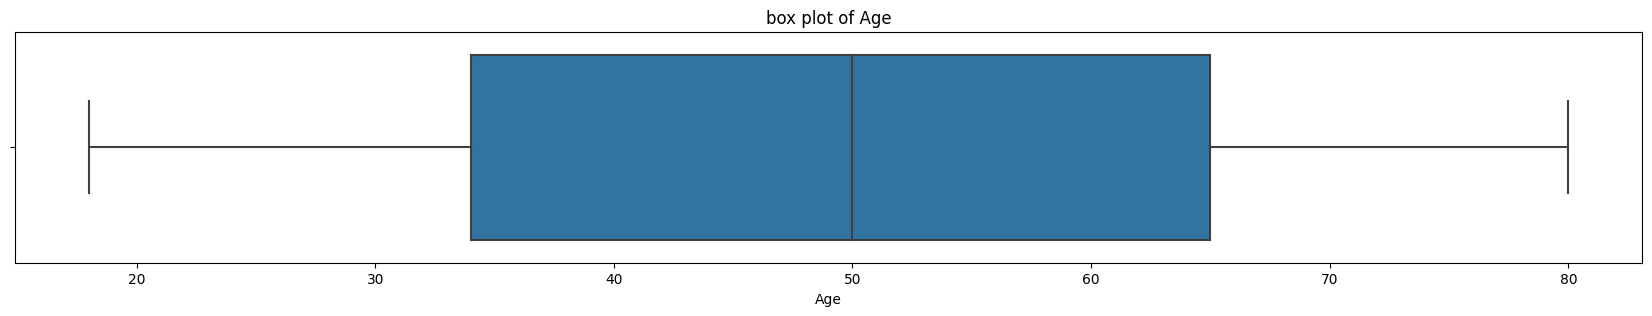

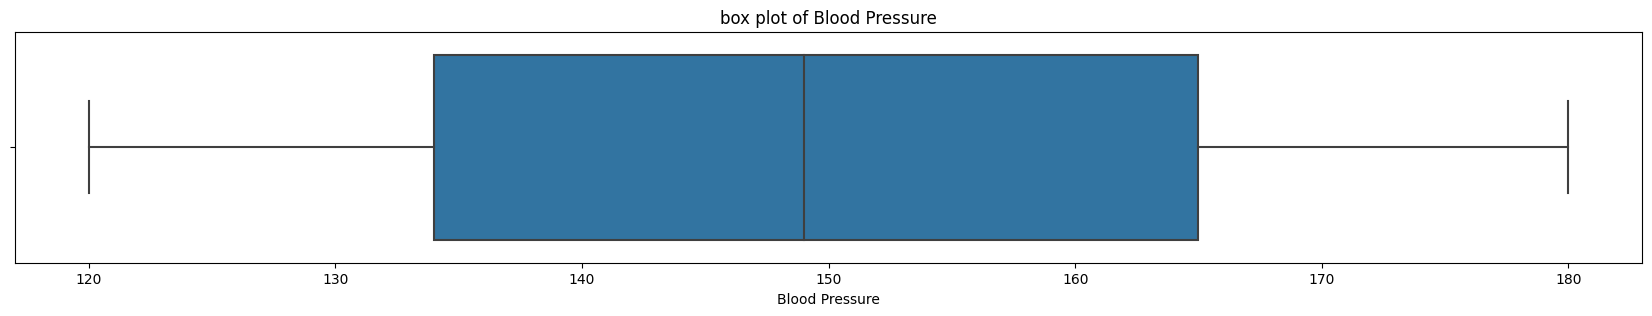

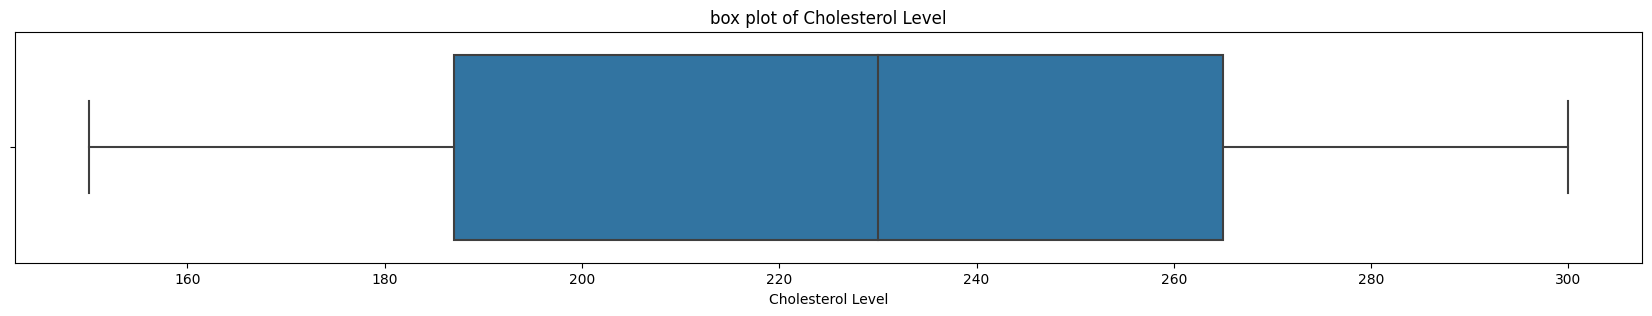

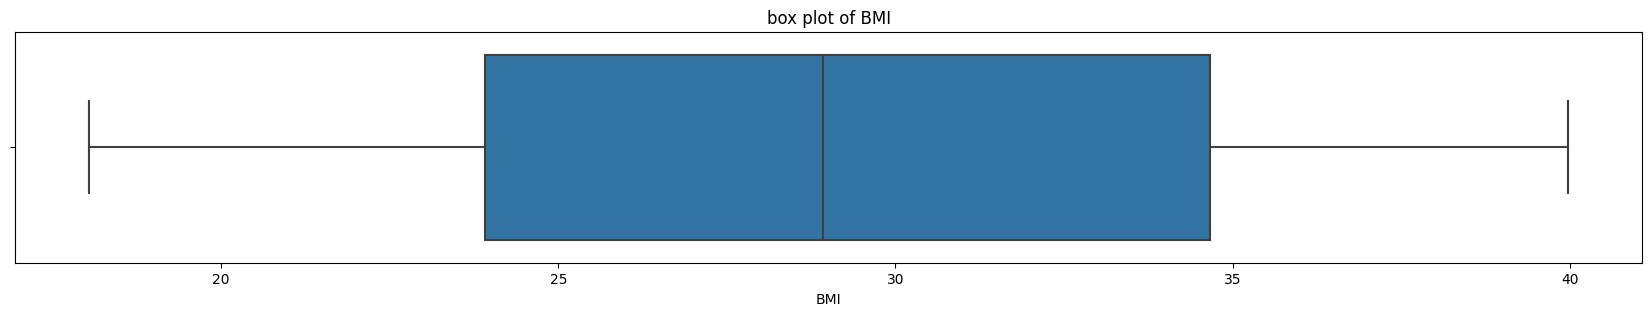

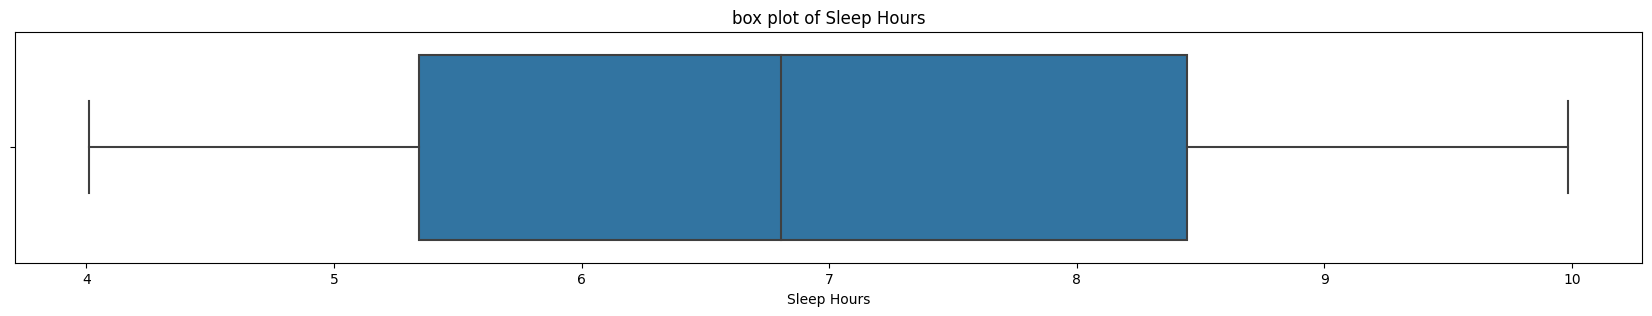

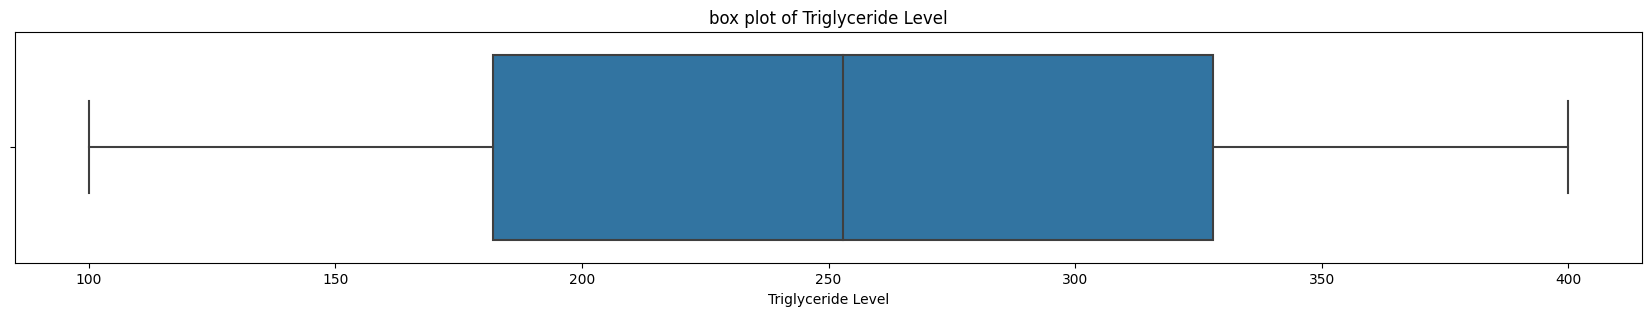

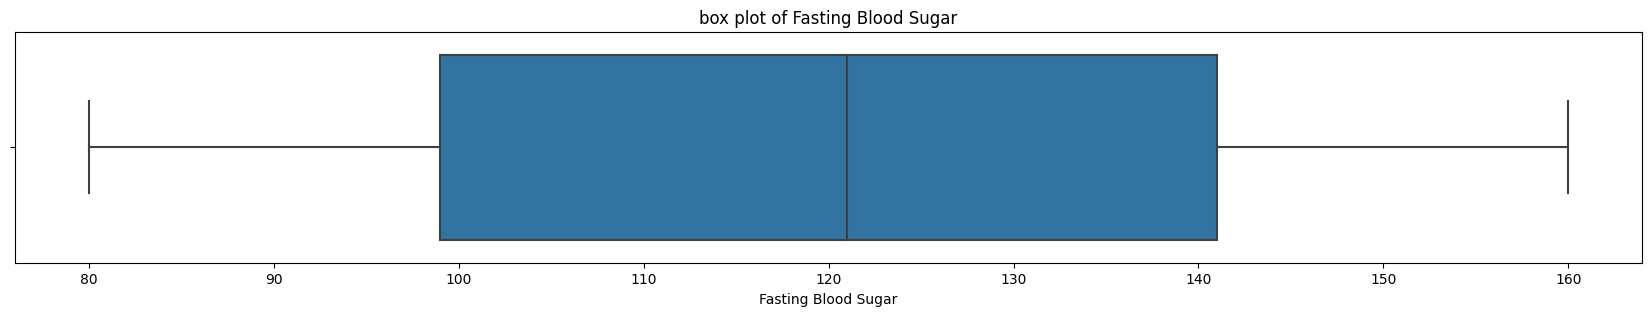

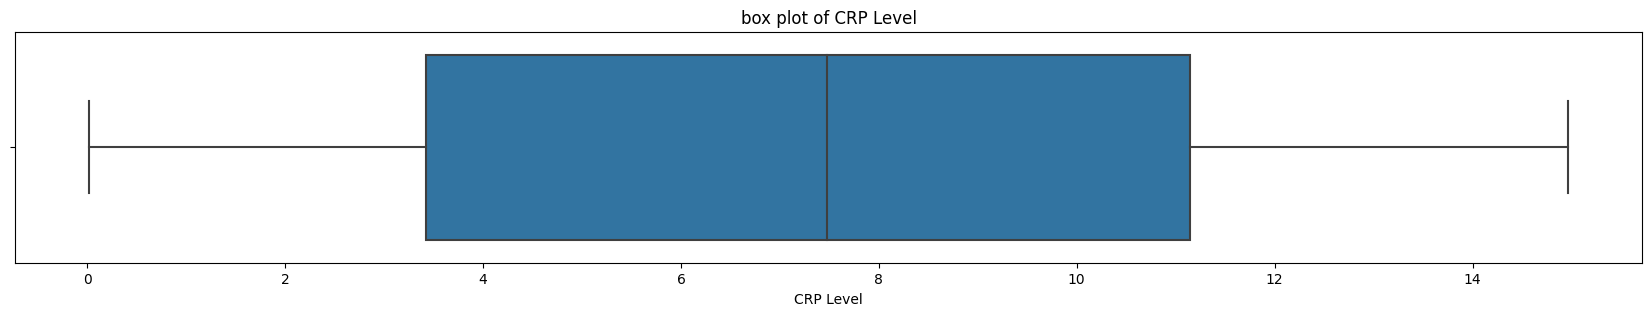

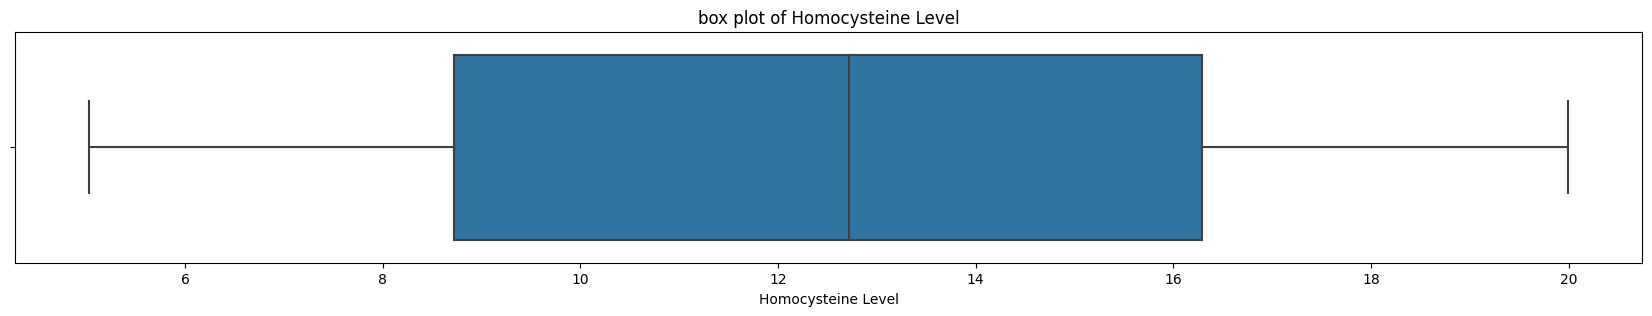

In [257]:
numerical_attributes = df.select_dtypes(include=['number']).columns

for col in numerical_attributes:
    plt.figure(figsize=(21,3))
    sns.boxplot(x=df[col])
    plt.title(f"box plot of {col}")
    plt.show()
    

Here we can see there are no outlier points in the numerical data.
We will now move onto outliers in categorical data.

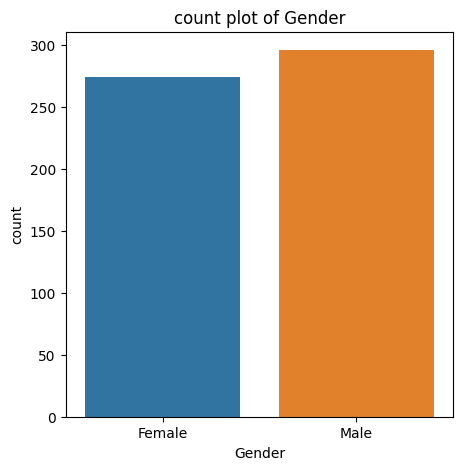

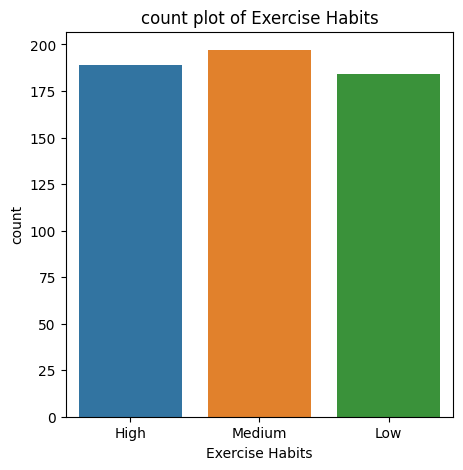

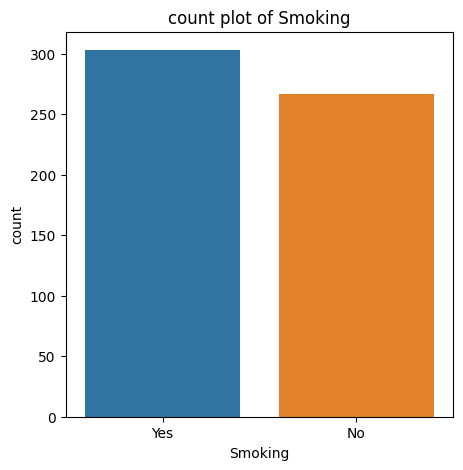

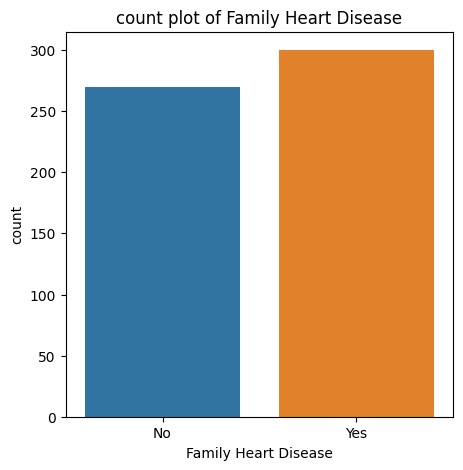

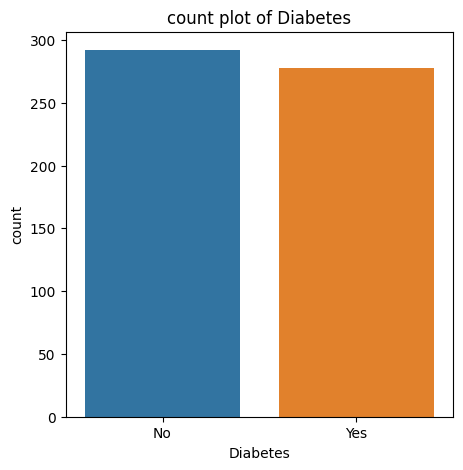

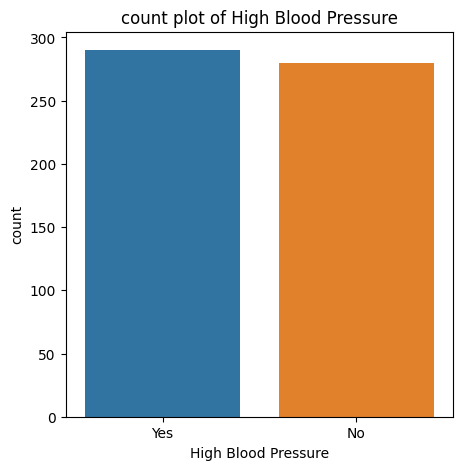

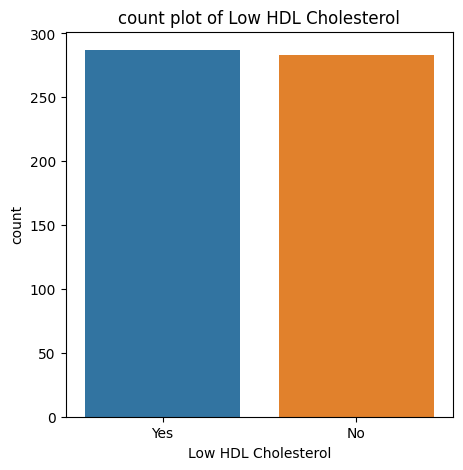

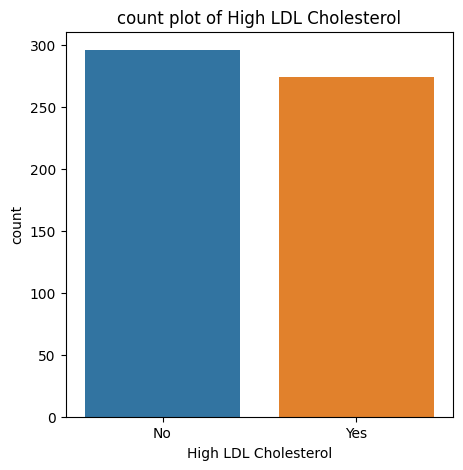

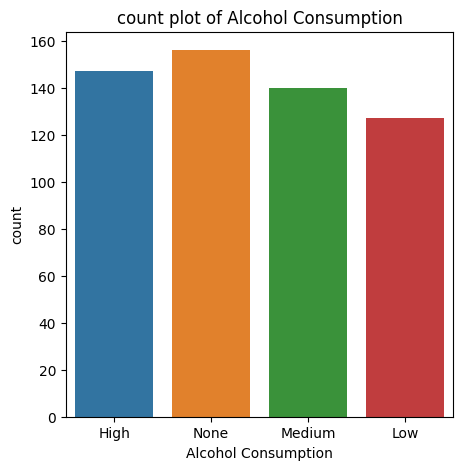

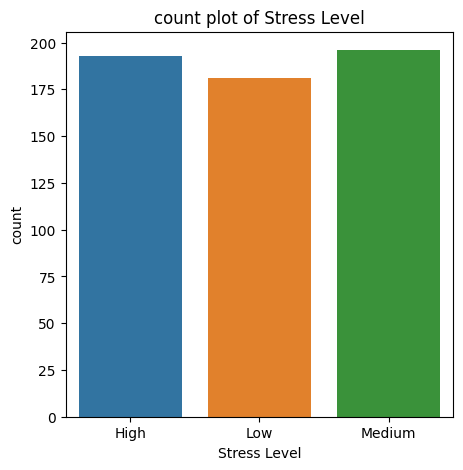

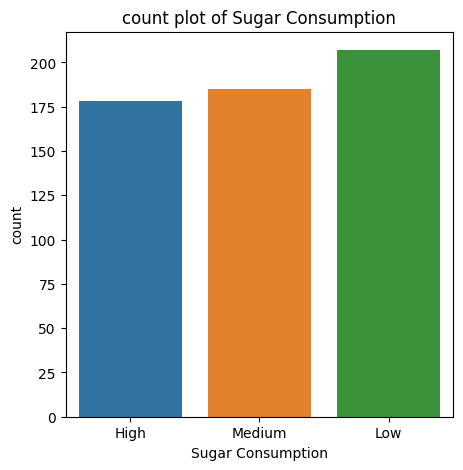

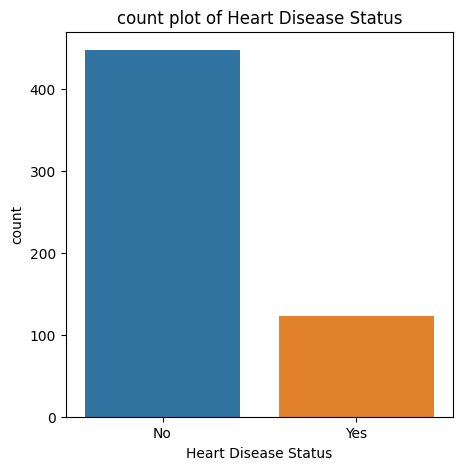

In [258]:

categorical_attributes = df.select_dtypes(include=['object']).columns

for col in categorical_attributes:
    plt.figure(figsize=(5,5))
    sns.countplot(x=df[col])
    plt.title(f"count plot of {col}")
    plt.show()



#### 1.2.5 ....
...

## 1.3 Load: Storing Processed Data into CSV

* This section involves....

# Section 2: Visualising data using matplotlib, seaborn & plotly